<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/validation_curve_by_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# creating the pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
  LinearRegression(**kwargs))

#making the data 
import numpy as np
def make_data(N, err=1.0, rseed=1):
  # randomly sample the data
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1. / (X.ravel() + 0.1)
  if err > 0:
    y += err * rng.randn(N)
  return X, y

  
X, y = make_data(40)

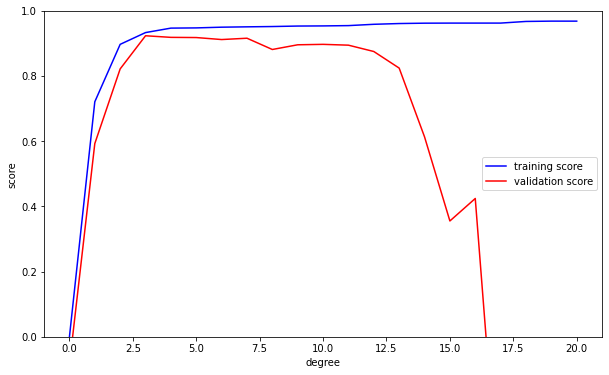

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
 'polynomialfeatures__degree',
degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');